# Open Source Energy System Modeling: Homework 2
by Philipp Mascherbauer

In [89]:
# import packages
import pyam
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style

matplotlib.style.use("seaborn-dark")

show possible models and projects:

In [90]:
conn = pyam.iiasa.Connection()
conn.valid_connections

pyam.iiasa - INFO: You are connected as an anonymous user


['ar6-public',
 'ariadne',
 'cdlinks',
 'cmin',
 'commit',
 'deeds',
 'engage',
 'hotspots',
 'india_scenario_hub',
 'integration-test',
 'nexus-basins',
 'ngfs',
 'ngfs_2',
 'openentrance',
 'paris_lttg',
 'ripples',
 'senses',
 'setnav',
 'iamc15',
 'iamc15-qa',
 'sandbox']

The data has been downloaded from the IAMC 1.5°C scenario Explorer for the
ar6-public project. [1]

#### Using the MESSAGEix-GLOBIOM 1.0 [2]
because Daniel said it's the best :)

In [91]:
# show scenarios
df = pyam.IamDataFrame(data='iamc-1.5c-explorer_snapshot_1653646930.csv')
message_df = df.filter(model="MESSAGEix-GLOBIOM 1.0")
message_df.scenario

pyam.core - INFO: Reading file iamc-1.5c-explorer_snapshot_1653646930.csv


['CD-LINKS_INDCi',
 'CD-LINKS_NPi',
 'CD-LINKS_NPi2020_1000',
 'CD-LINKS_NPi2020_1600',
 'CD-LINKS_NPi2020_400',
 'CD-LINKS_NoPolicy',
 'LowEnergyDemand']

Investigating the residential and commercial energy demand:

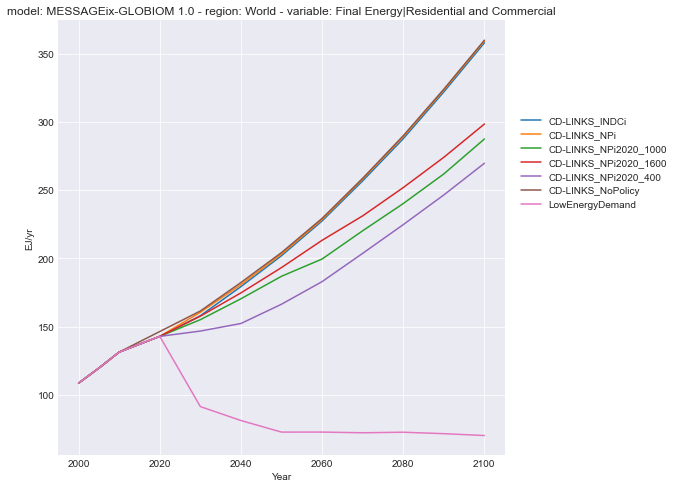

In [92]:
fig, ax = plt.subplots(figsize=(8, 8))
message_df.filter(variable='Final Energy|Residential and Commercial', region='World').plot(ax=ax,legend=True)
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8))
ax.grid()

We can see that the CD-LINKS-scenarios predict a significant increase in energy demand whereas the Low Energy Demand scenario
decreases energy demand from 2020 ongoing.
Looking at the CO2 emissions in these scenarios:

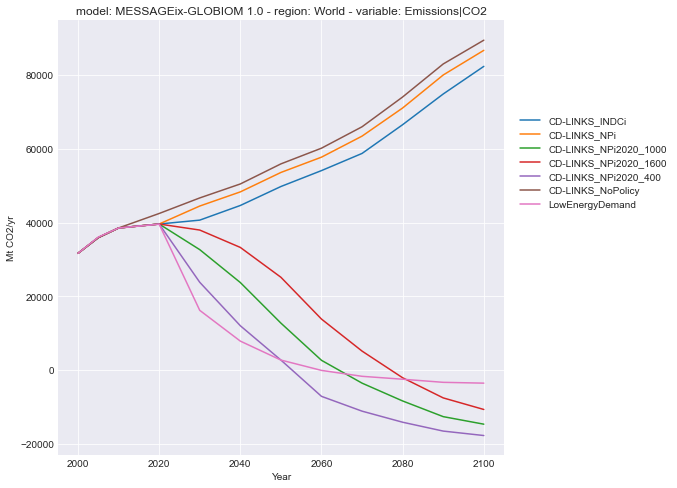

In [93]:
fig, ax = plt.subplots(figsize=(8, 8))
message_df.filter(variable='Emissions|CO2', region='World').plot(ax=ax,legend=True)
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8))
ax.grid()

Even though the energy demand rises significantly in the CD-LINKS-scenarios, some of them reduce their
CO2 emissions below 0 until 2080. In all these scenarios the reduction of CO2 emissions
heavily depends on the usage of carbon capture and storage (CCS).

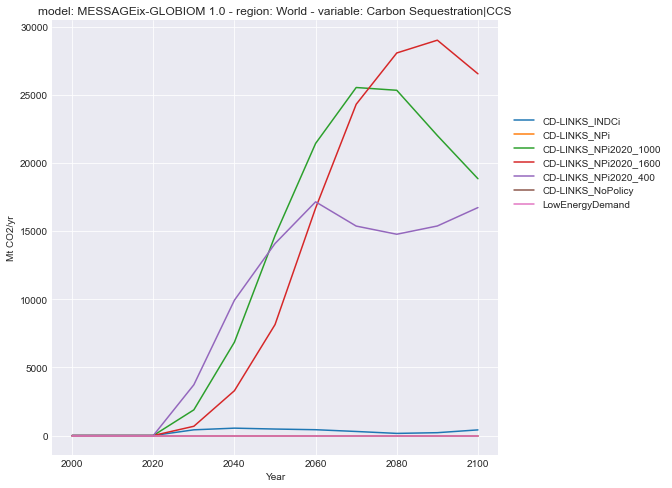

In [94]:
fig, ax = plt.subplots(figsize=(8, 8))
message_df.filter(variable='Carbon Sequestration|CCS', region='World').plot(ax=ax,legend=True)
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8))
ax.grid()


If CCS does not take up in any of these trends where CO2 emissions are reduced, then the only
way to effectively reduce carbon emissions is the "Low Energy Demand" scenario.
Therefore, we take a closer look at the "Low Energy Demand" and what needs to happen in
the residential sector to fulfill this target:

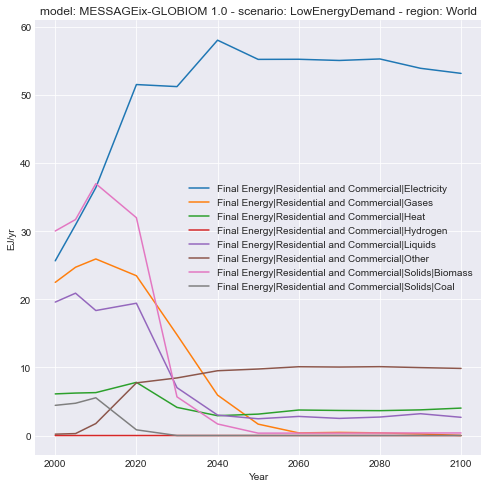

In [95]:
fig, ax = plt.subplots(figsize=(8, 8))
message_df.filter(variable=['Final Energy|Residential and Commercial|Electricity',
                            'Final Energy|Residential and Commercial|Heat',
                            'Final Energy|Residential and Commercial|Gases',
                            'Final Energy|Residential and Commercial|Hydrogen',
                            'Final Energy|Residential and Commercial|Solids|Biomass',
                            'Final Energy|Residential and Commercial|Solids|Coal',
                            'Final Energy|Residential and Commercial|Liquids',
                            'Final Energy|Residential and Commercial|Other'],
                  region='World').plot(ax=ax,legend=True)
ax.grid()

Even when predicting low demand, the electricity demand will rise tremendously
until 2040. Hydrogen will remain mostly unused in the residential and commercial sector. Gases are being phased out
completely until 2080 and are significantly reduced until 2050. The overall heat demand is reduced from 2020 onwards.
Coal is phased out in 2030 whereas Biomass is reduced to 0.37 EJ/year in 2060 and remains at this value. Also Biomass
is reduced rapidly from 2020 to 2030. Liquids remain in use
after they decreased by almost 70% from 2020 to 2030. Other energy carriers increase.

## Conclusion
Currently, CCS technology is still not used widely around the world. CO2 costs are too low around the world to
make this technology profitable. If we can not count on CCS, the only way to
achieve net-zero CO2 emissions, is by lowering the overall demand. In the residential and
commercial sector this means:
- a total phase out of coal until 2030
- reduction in gas usage of ~93% until 2050
- reduction in liquids of ~70% until 2030
- reduction in biomass of ~82% until 2030
Current developments in Europe do not reflect these trends. Especially biomass counting as a green
technology and being an easy alternative for gas systems, will most probably increase in the coming
years.


## License

   [<img style="float: right;" src="https://img.shields.io/badge/License-Apache%202.0-blue.svg">](https://opensource.org/licenses/Apache-2.0)

   Copyright 2022 Philipp Mascherbauer

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

     http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.

## References
[1] Daniel Huppmann, Elmar Kriegler, Volker Krey, Keywan Riahi, Joeri Rogelj, Steven K. Rose, John Weyant, Nico Bauer, Christoph Bertram, Valentina Bosetti, Katherine Calvin, Jonathan Doelman, Laurent Drouet, Johannes Emmerling, Stefan Frank, Shinichiro Fujimori, David Gernaat, Arnulf Grubler, Celine Guivarch, Martin Haigh, Christian Holz, Gokul Iyer, Etsushi Kato, Kimon Keramidas, Alban Kitous, Florian Leblanc, Jing-Yu Liu, Konstantin Löffler, Gunnar Luderer, Adriana Marcucci, David McCollum, Silvana Mima, Alexander Popp, Ronald D. Sands, Fuminori Sano, Jessica Strefler, Junichi Tsutsui, Detlef Van Vuuren, Zoi Vrontisi, Marshall Wise, and Runsen Zhang.
IAMC 1.5°C Scenario Explorer and Data hosted by IIASA.
Integrated Assessment Modeling Consortium & International Institute for Applied Systems Analysis, 2018.
doi: 10.22022/SR15/08-2018.15429 | url: data.ene.iiasa.ac.at/iamc-1.5c-explorer

[2] International Institute for Applied Systems Analysis (IIASA), Austria, global model description:
http://data.ene.iiasa.ac.at/message-globiom/. Model documentation and code (MESSAGEix) http://messageix.iiasa.ac.at
main users: IIASA, the MESSAGE model is distributed via the International Atomic Energy Agency (IAEA) to member
countries, the new MESSAGEix model is available as an open source tool via GitHub (https://github.com/iiasa/message_ix)
